In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("imdb.csv", encoding='iso-8859-1')
df

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,20082013,62 eps,18,9.5,(2.2M),TV Series
1,2. Planet Earth II,2016,6 eps,PG,9.5,(159K),TV Mini Series
2,3. Planet Earth,2006,11 eps,PG,9.4,(221K),TV Mini Series
3,4. Band of Brothers,2001,10 eps,15,9.4,(533K),TV Mini Series
4,5. Chernobyl,2019,5 eps,15,9.3,(876K),TV Mini Series
...,...,...,...,...,...,...,...
245,246. Your Lie in April,20142015,24 eps,12,8.5,(39K),TV Series
246,247. Community,20092015,110 eps,12,8.5,(295K),TV Series
247,248. Tear Along the Dotted Line,2021,6 eps,15,8.6,(15K),TV Mini Series
248,249. Chef's Table,20152019,30 eps,15,8.5,(17K),TV Series


In [115]:
def convert(vote_count):
    vote_count = vote_count.strip('()')  
    if 'M' in vote_count:
        return int(float(vote_count.replace('M', '')) * 1_000_000)
    elif 'K' in vote_count:
        return int(float(vote_count.replace('K', '')) * 1_000)
    else:
        return int(vote_count)

df['Vote_count'] = df['Vote_count'].apply(convert)



In [116]:
def convert_episodes(episodes):
    return int(episodes.replace(' eps', ''))

df['Total_episodes'] = df['Total_episodes'].apply(convert_episodes)

df

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,20082013,62,18,9.5,2200000,TV Series
1,2. Planet Earth II,2016,6,PG,9.5,159000,TV Mini Series
2,3. Planet Earth,2006,11,PG,9.4,221000,TV Mini Series
3,4. Band of Brothers,2001,10,15,9.4,533000,TV Mini Series
4,5. Chernobyl,2019,5,15,9.3,876000,TV Mini Series
...,...,...,...,...,...,...,...
245,246. Your Lie in April,20142015,24,12,8.5,39000,TV Series
246,247. Community,20092015,110,12,8.5,295000,TV Series
247,248. Tear Along the Dotted Line,2021,6,15,8.6,15000,TV Mini Series
248,249. Chef's Table,20152019,30,15,8.5,17000,TV Series


In [117]:
def convert_age(age):
    try:
        return int(age)
    except ValueError:
        return 0  

df['Age'] = df['Age'].apply(convert_age)

In [118]:
def split_year(year):
    year = year.replace('\x96', '–') 
    if '–' in year:
        start_year, end_year = year.split('–')
        if start_year and end_year:  
            return int(start_year), int(end_year)
        else:
            return None, None
    else:
        if year:  
            start_year = int(year)
            end_year = int(year)
            return start_year, start_year
        else:
            return None, None

df[['start_year', 'end_year']] = df['Year'].apply(split_year).apply(pd.Series)

In [119]:
df["start_year"]=df["start_year"].fillna(0)


In [120]:
df['end_year'] = df['end_year'].fillna(0)


In [121]:
df["start_year"]=df["start_year"].astype(int)
df['end_year'] = df['end_year'].astype(int)


In [122]:
df

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category,start_year,end_year
0,1. Breaking Bad,20082013,62,18,9.5,2200000,TV Series,2008,2013
1,2. Planet Earth II,2016,6,0,9.5,159000,TV Mini Series,2016,2016
2,3. Planet Earth,2006,11,0,9.4,221000,TV Mini Series,2006,2006
3,4. Band of Brothers,2001,10,15,9.4,533000,TV Mini Series,2001,2001
4,5. Chernobyl,2019,5,15,9.3,876000,TV Mini Series,2019,2019
...,...,...,...,...,...,...,...,...,...
245,246. Your Lie in April,20142015,24,12,8.5,39000,TV Series,2014,2015
246,247. Community,20092015,110,12,8.5,295000,TV Series,2009,2015
247,248. Tear Along the Dotted Line,2021,6,15,8.6,15000,TV Mini Series,2021,2021
248,249. Chef's Table,20152019,30,15,8.5,17000,TV Series,2015,2019


In [123]:
df = df.drop(columns=['Year'])

In [124]:
df['Titile'] = df['Titile'].str.replace(r'^\d+\.\s+', '', regex=True)
df

,Titile,Total_episodes,Age,Rating,Vote_count,Category,start_year,end_year
0,Breaking Bad,62,18,9.5,2200000,TV Series,2008,2013
1,Planet Earth II,6,0,9.5,159000,TV Mini Series,2016,2016
2,Planet Earth,11,0,9.4,221000,TV Mini Series,2006,2006
3,Band of Brothers,10,15,9.4,533000,TV Mini Series,2001,2001
4,Chernobyl,5,15,9.3,876000,TV Mini Series,2019,2019
...,...,...,...,...,...,...,...,...
245,Your Lie in April,24,12,8.5,39000,TV Series,2014,2015
246,Community,110,12,8.5,295000,TV Series,2009,2015
247,Tear Along the Dotted Line,6,15,8.6,15000,TV Mini Series,2021,2021
248,Chef's Table,30,15,8.5,17000,TV Series,2015,2019


In [125]:
df = df.rename(columns={'Titile': 'Title'})
df


,Title,Total_episodes,Age,Rating,Vote_count,Category,start_year,end_year
0,Breaking Bad,62,18,9.5,2200000,TV Series,2008,2013
1,Planet Earth II,6,0,9.5,159000,TV Mini Series,2016,2016
2,Planet Earth,11,0,9.4,221000,TV Mini Series,2006,2006
3,Band of Brothers,10,15,9.4,533000,TV Mini Series,2001,2001
4,Chernobyl,5,15,9.3,876000,TV Mini Series,2019,2019
...,...,...,...,...,...,...,...,...
245,Your Lie in April,24,12,8.5,39000,TV Series,2014,2015
246,Community,110,12,8.5,295000,TV Series,2009,2015
247,Tear Along the Dotted Line,6,15,8.6,15000,TV Mini Series,2021,2021
248,Chef's Table,30,15,8.5,17000,TV Series,2015,2019


In [126]:
top3_voted = df.sort_values(by='Vote_count', ascending=False).head(3)
top3_voted

,Title,Total_episodes,Age,Rating,Vote_count,Category,start_year,end_year
12,Game of Thrones,74,18,9.2,2300000,TV Series,2011,2019
0,Breaking Bad,62,18,9.5,2200000,TV Series,2008,2013
112,Stranger Things,42,15,8.7,1400000,TV Series,2016,2025


Top3 voted Shows

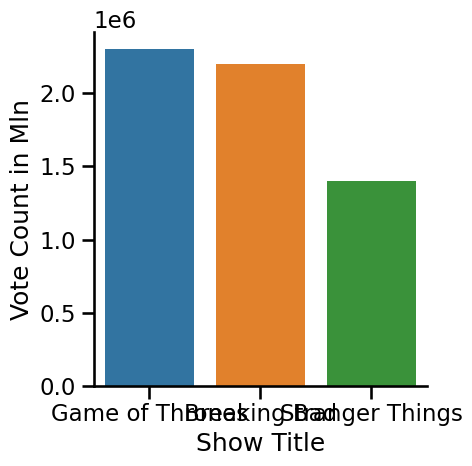

In [127]:
g=sns.catplot(x=top3_voted["Title"], y=top3_voted["Vote_count"], data = top3_voted, kind = "bar", hue=top3_voted["Title"])
g.set_axis_labels("Show Title", "Vote Count in Mln")

plt.show()

As it is shown, shows named Breaking Bad and Game of Thrones are ranked first at over 2 mln votes

In [128]:
by_category = df.groupby('Category')['Vote_count'].max().reset_index()

by_category_df = pd.merge(by_category, df, on=['Category', 'Vote_count'], how='left')[['Category', 'Title', 'Vote_count']]

by_category_df


,Category,Title,Vote_count
0,TV Mini Series,Chernobyl,876000
1,TV Series,Game of Thrones,2300000


## What is the most voted show by category?

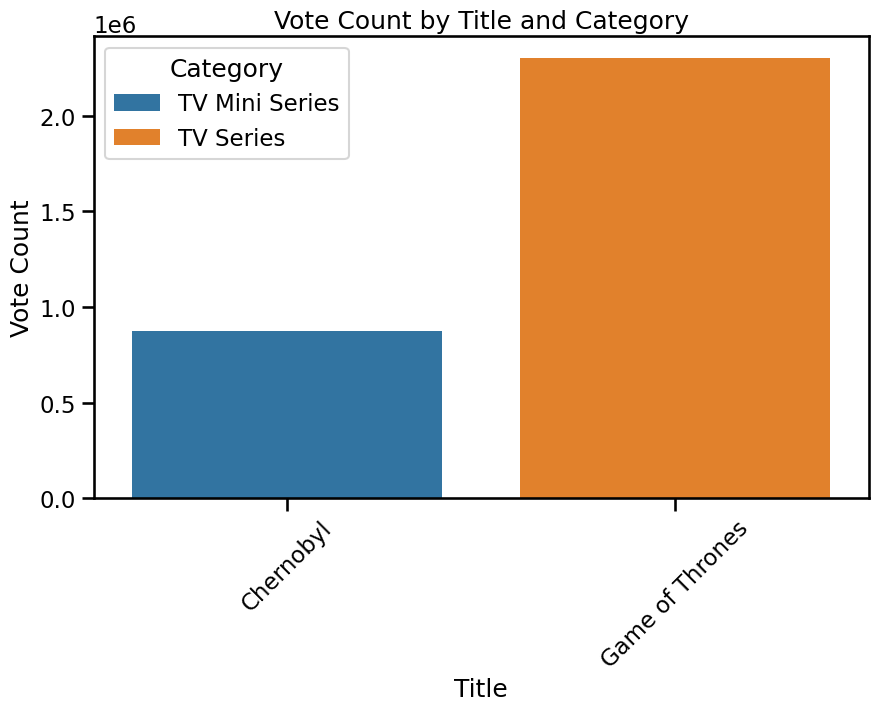

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Title", y="Vote_count", hue="Category", data=by_category_df)

plt.xlabel("Title")
plt.ylabel("Vote Count")
plt.title("Vote Count by Title and Category")
plt.xticks(rotation=45)  

plt.show()


Tv seiria named Game of Thrones is the most voted show while Mini seria named Chernobyl is the most voted in its category

The longest running shows

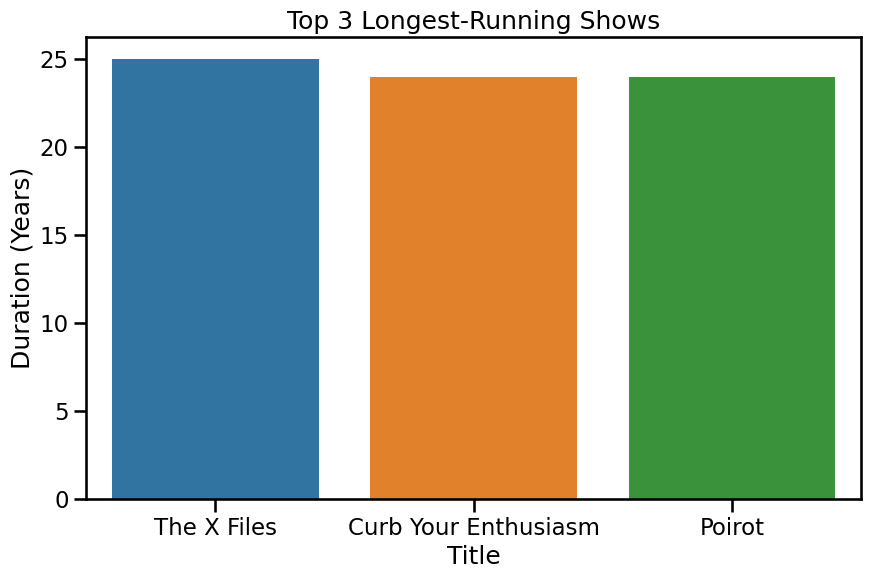

In [130]:
df['Duration'] = df['end_year'] - df['start_year']

top3_longest_running = df.sort_values(by='Duration', ascending=False).head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Duration', data=top3_longest_running, hue="Title", )
sns.set_context("talk")

plt.xlabel("Title")
plt.ylabel("Duration (Years)")
plt.title("Top 3 Longest-Running Shows")
plt.show()


As it is shown, the longest running shows are The x Files, Curb your Enthuasiasm and Poirot which are at almost 25 years

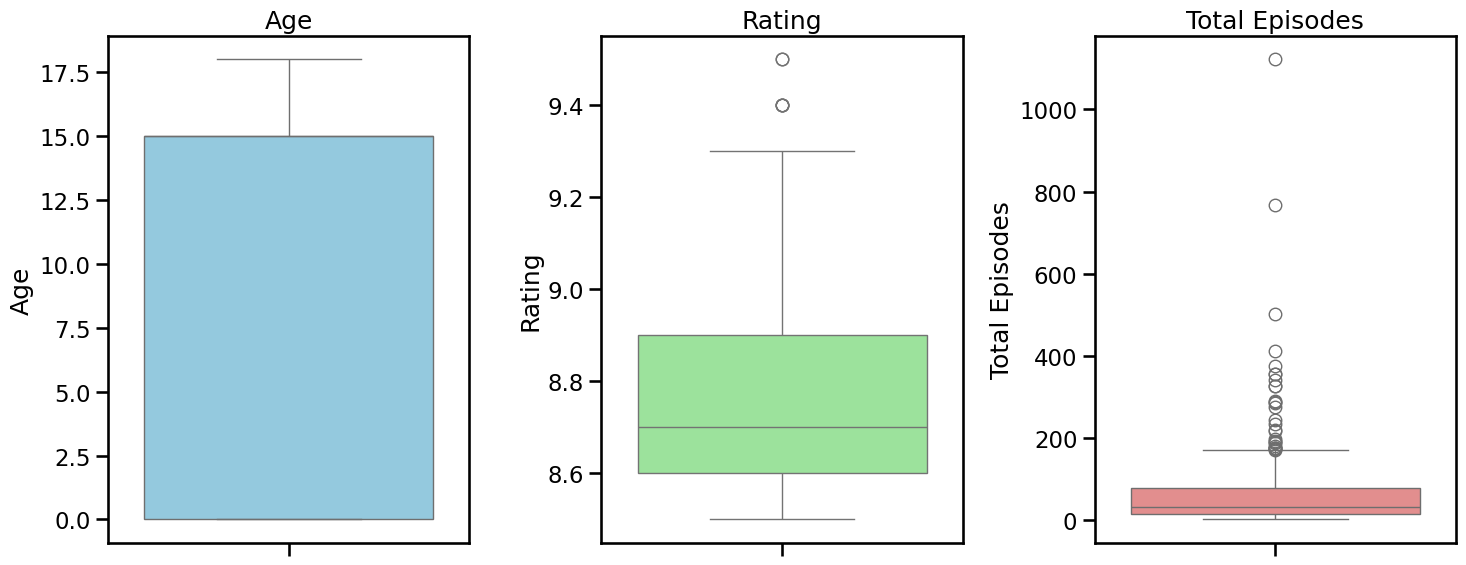

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(ax=axes[0], y=df['Age'], color='skyblue')
axes[0].set_ylabel('Age')
axes[0].set_title('Age')

sns.boxplot(ax=axes[1], y=df['Rating'], color='lightgreen')
axes[1].set_ylabel('Rating')
axes[1].set_title('Rating')

sns.boxplot(ax=axes[2], y=df['Total_episodes'], color='lightcoral')
axes[2].set_ylabel('Total Episodes')
axes[2].set_title('Total Episodes')

plt.tight_layout()
plt.show()



## is the voting affected on rating?

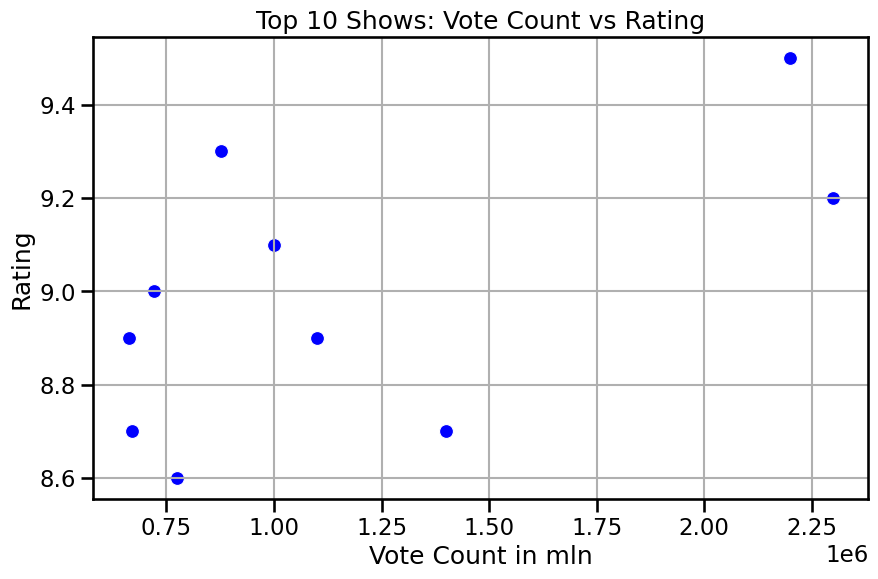

In [132]:

top10_voted = top3_voted = df.sort_values(by='Vote_count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vote_count', y='Rating', data=top10_voted, s=100, color='blue', marker='o')

plt.xlabel("Vote Count in mln")
plt.ylabel("Rating")
plt.title("Top 10 Shows: Vote Count vs Rating")

plt.grid(True)
plt.show()



Looking at the table we can say that the voting is not depend on rating, becuase tv shows which was voted less than a million is high rated which was over 8.8

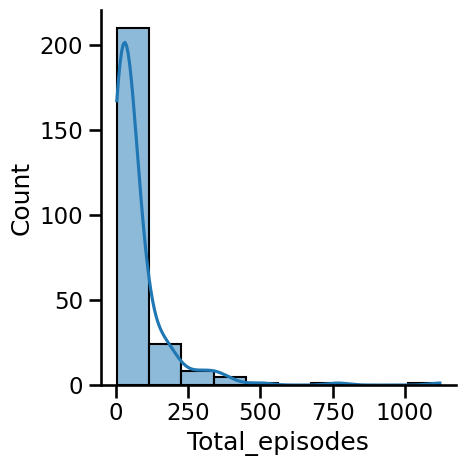

In [133]:
sns.displot(df["Total_episodes"], kde=True, bins=10)
plt.show()

<Axes: xlabel='Age', ylabel='Rating'>

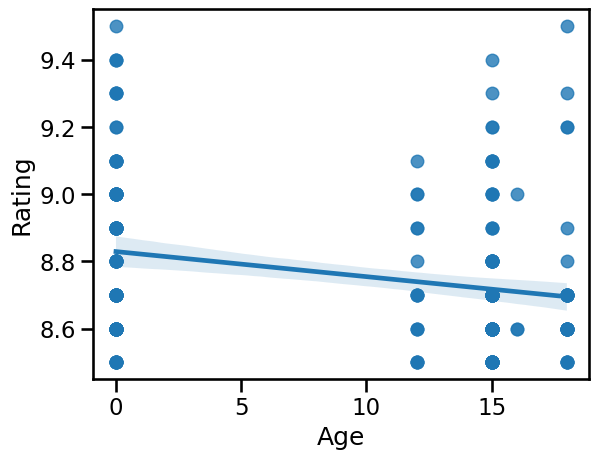

In [134]:
sns.regplot(data=df, x="Age", y="Rating" )

In [137]:
!version --seaborn


zsh:1: command not found: version
